In [1]:
%load_ext rpy2.ipython

# 3.3 Interactions

## Read the data

Data are in the *child.iq* directory of the ARM_Data download-- you might have
to change the path I use below to reflect the path on your computer.

In [2]:
%%R
# I had to import foreign to get access to read.dta
library("foreign")
kidiq <- read.dta("../../ARM_Data/child.iq/kidiq.dta")

# I won't attach kidiq-- i generally don't attach to avoid confusion(s)
#attach(kidiq)

Load the *arm* library-- see the Chapter 3.1 notebook if you need help.

In [7]:
%%R
library("arm")

## Regression-- interactions, Pg 34

In [4]:
%%R
fit <- lm(kidiq$kid_score ~ kidiq$mom_hs + kidiq$mom_iq + kidiq$mom_hs:kidiq$mom_iq)
display(fit)

lm(formula = kidiq$kid_score ~ kidiq$mom_hs + kidiq$mom_iq + 
    kidiq$mom_hs:kidiq$mom_iq)
                          coef.est coef.se
(Intercept)               -11.48    13.76 
kidiq$mom_hs               51.27    15.34 
kidiq$mom_iq                0.97     0.15 
kidiq$mom_hs:kidiq$mom_iq  -0.48     0.16 
---
n = 434, k = 4
residual sd = 17.97, R-Squared = 0.23


## Figure 3.4 (a), Pg 35

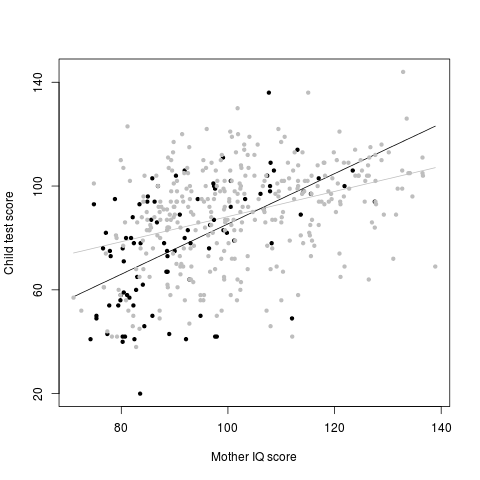

In [5]:
%%R
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score",
     pch=20, xaxt="n", yaxt="n", type="n")
curve(coef(fit)[1] + coef(fit)[2] + (coef(fit)[3] + coef(fit)[4])*x,
      add=TRUE, col="gray")
curve(coef(fit)[1] + coef(fit)[3]*x, add=TRUE)
points(kidiq$mom_iq[kidiq$mom_hs==0], kidiq$kid_score[kidiq$mom_hs==0],
       pch=20)
points(kidiq$mom_iq[kidiq$mom_hs==1], kidiq$kid_score[kidiq$mom_hs==1],
       col="gray", pch=20)
axis(1, c(80,100,120,140))
axis(2, c(20,60,100,140))

## Figure 3.4 (b), Pg 35

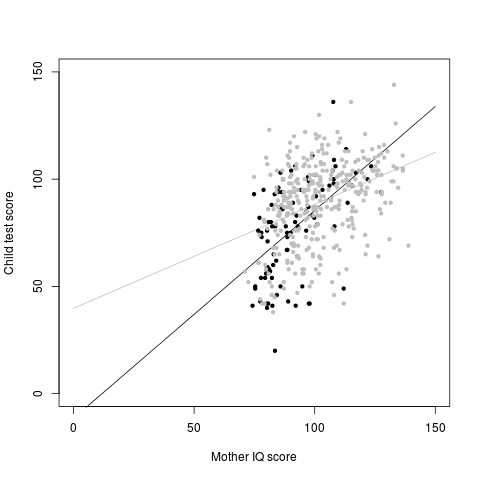

In [6]:
%%R
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score",
     pch=20, type="n", xlim=c(0,150), ylim=c(0,150))
curve(coef(fit)[1] + coef(fit)[2] + (coef(fit)[3] + coef(fit)[4])*x,
      add=TRUE, col="gray")
curve(coef(fit)[1] + coef(fit)[3]*x, add=TRUE)
points(kidiq$mom_iq[kidiq$mom_hs==0], kidiq$kid_score[kidiq$mom_hs==0],
       pch=20)
points(kidiq$mom_iq[kidiq$mom_hs==1], kidiq$kid_score[kidiq$mom_hs==1],
       col="gray", pch=20)